In [13]:
from ERA5.ERA5_processor import era5_processing
from NEX_GDDP_CMIP6.NEX_GDDP_CMIP6_processor import nexgddpcmip6_processing
from calculations.calculations import heat_index
from calculations.calculations import wind_chill
from calculations import calculations
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib
from datetime import datetime
import dask
import xarray as xr
import time
import numpy as np
import metpy
from metpy.units import units

# Testing ERA5 

In [20]:
temp = era5_processing('2m_temperature', 1935, 1959, 'analysis_ready')
temp

Done
<xarray.DataArray '2m_temperature' (time: 219144, lat: 29, lon: 27)> Size: 686MB
dask.array<where, shape=(219144, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2MB 1935-01-01 ... 1959-12-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K


<xarray.DataArray '2m_temperature' (time: 219144, lat: 29, lon: 27)> Size: 686MB
dask.array<where, shape=(219144, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 2MB 1935-01-01 ... 1959-12-31T23:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

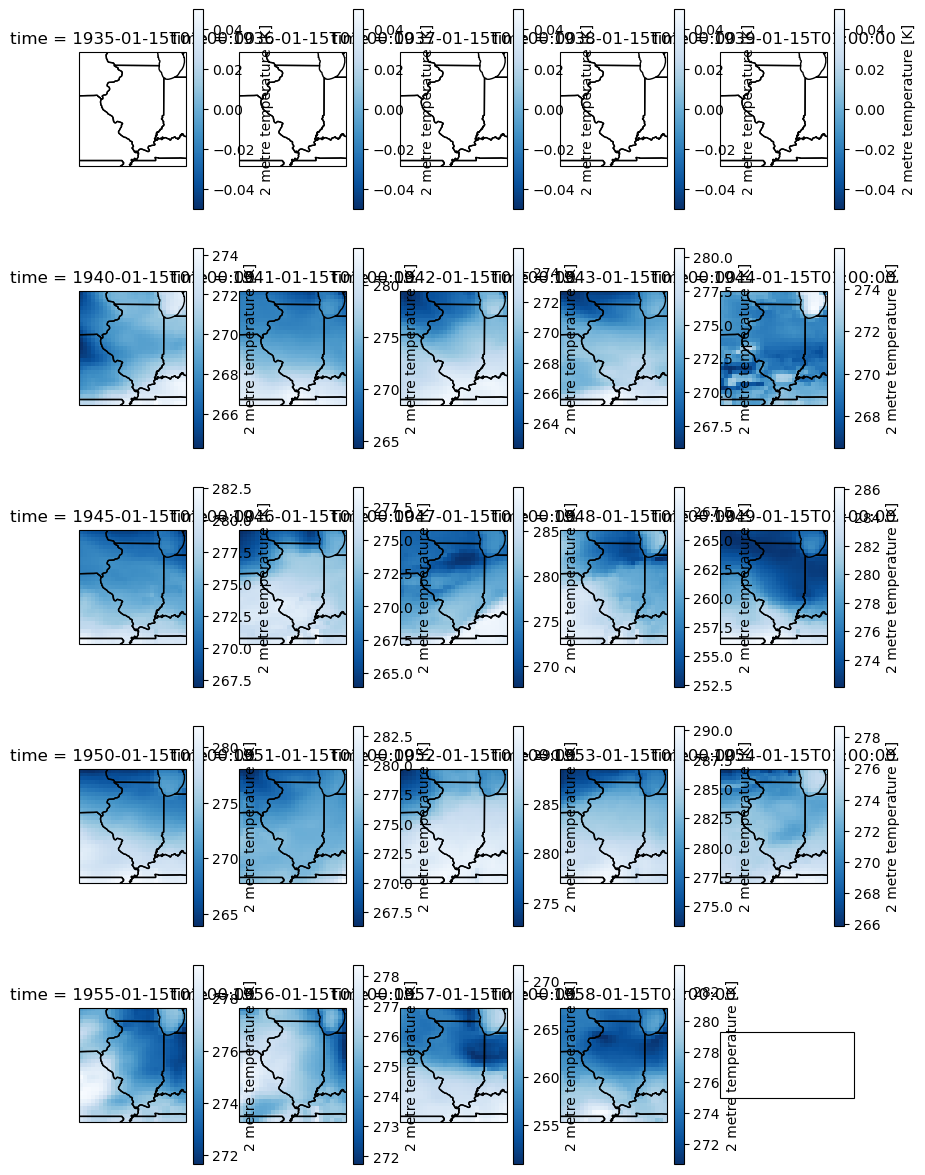

In [21]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(5,5, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(1935,1959):
    temp.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Vapor Pressure

In [9]:
vapor_p = era5_processing('vapor_pressure', 2004, 2024, 'analysis_ready')
vapor_p

Done
<xarray.DataArray '2m_dewpoint_temperature' (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<where, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00
Attributes:
    long_name:   2 metre dewpoint temperature
    short_name:  d2m
    units:       K


<xarray.DataArray '2m_dewpoint_temperature' (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<mul, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

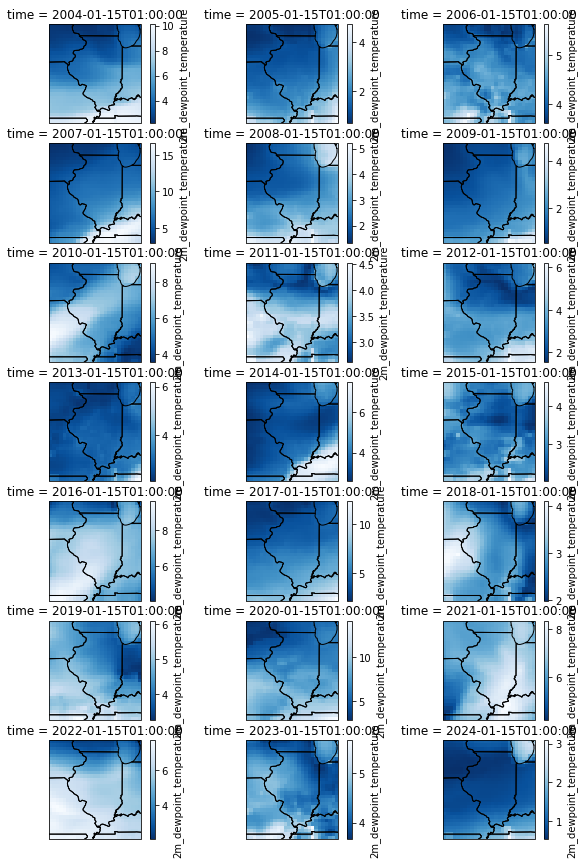

In [3]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    vapor_p.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Wind magnitude

In [2]:
sfcWind_era5 = era5_processing('sfcWind', 2004, 2024, 'analysis_ready')

Done
<xarray.Dataset> Size: 1GB
Dimensions:                  (time: 184104, lat: 29, lon: 27)
Coordinates:
  * lat                      (lat) float32 116B 43.25 43.0 42.75 ... 36.5 36.25
  * lon                      (lon) float32 108B 267.2 267.5 ... 273.5 273.8
  * time                     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12...
Data variables:
    10m_u_component_of_wind  (time, lat, lon) float32 577MB dask.array<chunksize=(24, 29, 27), meta=np.ndarray>
    10m_v_component_of_wind  (time, lat, lon) float32 577MB dask.array<chunksize=(24, 29, 27), meta=np.ndarray>
Attributes:
    last_updated:           2025-04-14 08:12:19.649353+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-01-31
    valid_time_stop_era5t:  2025-04-08


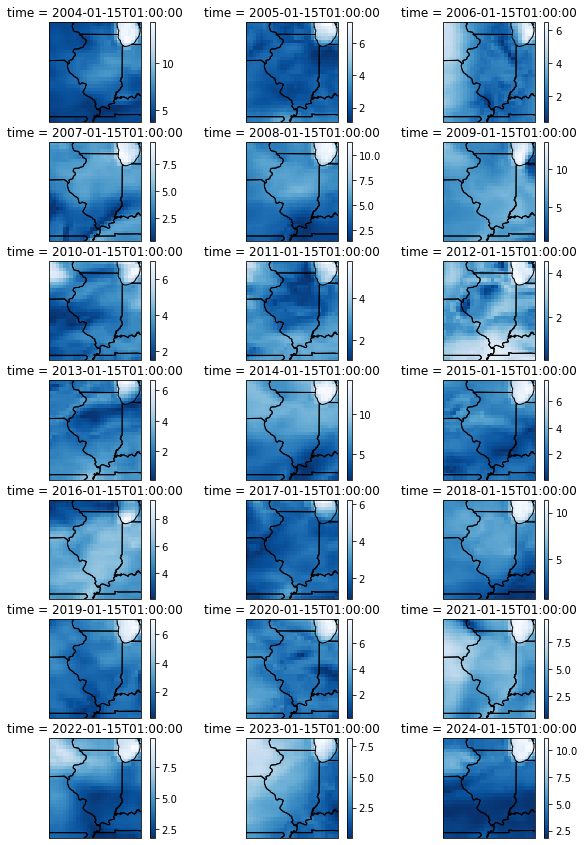

In [6]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    sfcWind_era5.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Relative Humidity

In [2]:
rh_era5 = era5_processing('relative_humidity', 2004, 2024, 'analysis_ready')
rh_era5

Done
<xarray.Dataset> Size: 1GB
Dimensions:                  (time: 184104, lat: 29, lon: 27)
Coordinates:
  * lat                      (lat) float32 116B 43.25 43.0 42.75 ... 36.5 36.25
  * lon                      (lon) float32 108B 267.2 267.5 ... 273.5 273.8
  * time                     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12...
Data variables:
    2m_temperature           (time, lat, lon) float32 577MB dask.array<chunksize=(24, 29, 27), meta=np.ndarray>
    2m_dewpoint_temperature  (time, lat, lon) float32 577MB dask.array<chunksize=(24, 29, 27), meta=np.ndarray>
Attributes:
    last_updated:           2025-04-10 06:31:42.216645+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2024-12-31
    valid_time_stop_era5t:  2025-04-04


<xarray.DataArray 'truediv-2c1df48b044ba5c650122c5cd968f411' (time: 184104,
                                                              lat: 29, lon: 27)> Size: 577MB
<Quantity(dask.array<truediv, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>, 'dimensionless')>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

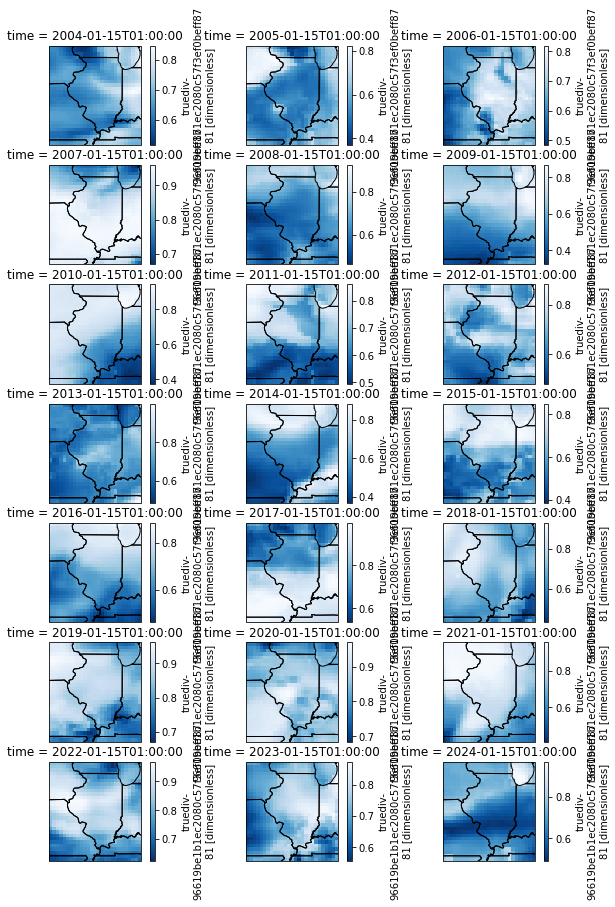

In [8]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    rh_era5.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r')
    ax[i].add_feature(cfeature.STATES)
    i += 1

# NEX-GDDP-CMIP6

### Vapor Pressure

In [2]:
vp_gddp = nexgddpcmip6_processing('ssp585', 'vp', 2015, 2035)
vp_gddp

ACCESS-CM2
ACCESS-ESM1-5
BCC-CSM2-MR doesn't have sufficient variables
CESM2
CESM2-WACCM
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3
EC-Earth3-Veg-LR
FGOALS-g3
GFDL-CM4
GFDL-ESM4
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-MM
IITM-ESM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
KIOST-ESM
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NESM3 doesn't have sufficient variables
NorESM2-LM
NorESM2-MM
TaiESM1
UKESM1-0-LL


<xarray.DataArray (model: 32, time: 7669, lon: 27, lat: 30)>
array([[[[ 1.4243073 ,  1.5078622 ,  1.5428303 , ...,  4.912593  ,
           4.9976425 ,  4.9887285 ],
         [ 1.4231057 ,  1.4975171 ,  1.5289329 , ...,  4.6995354 ,
           4.762148  ,  4.7498074 ],
         [ 1.4378328 ,  1.5078925 ,  1.5161856 , ...,  4.461485  ,
           4.538071  ,  4.5736265 ],
         ...,
         [ 1.8692334 ,  1.852679  ,  1.8490934 , ...,  2.0846527 ,
           2.1365502 ,  2.167508  ],
         [ 1.9866236 ,  1.9747776 ,  1.9490181 , ...,  2.055798  ,
           2.1311412 ,  2.119303  ],
         [ 2.0327997 ,  2.0218475 ,  1.9855074 , ...,  2.0232418 ,
           2.0879457 ,  2.0683973 ]],

        [[ 2.3415852 ,  2.5032203 ,  2.5830488 , ...,  7.0890136 ,
           7.0548897 ,  6.897229  ],
         [ 2.3319976 ,  2.4878707 ,  2.5612152 , ...,  6.8703613 ,
           6.8213634 ,  6.673193  ],
         [ 2.3470674 ,  2.504877  ,  2.5407681 , ...,  6.609458  ,
           6.595885  ,  6.5270815 ],
...
         [ 7.1244087 ,  7.341579  ,  7.569569  , ..., 10.535813  ,
          10.68128   , 10.739624  ],
         [ 7.488943  ,  7.754283  ,  7.9223595 , ..., 10.3242655 ,
          10.540131  , 10.403146  ],
         [ 7.617569  ,  7.9095483 ,  8.051377  , ..., 10.094674  ,
          10.244878  , 10.058753  ]],

        [[ 3.3511665 ,  3.4597268 ,  3.5910645 , ...,  6.7180595 ,
           7.030965  ,  7.2267985 ],
         [ 3.3519492 ,  3.4321587 ,  3.5664532 , ...,  6.914623  ,
           7.247332  ,  7.482407  ],
         [ 3.3882587 ,  3.448678  ,  3.543847  , ...,  7.0684147 ,
           7.4728827 ,  7.831404  ],
         ...,
         [ 5.36373   ,  5.495134  ,  5.5820775 , ..., 10.788766  ,
          11.309204  , 11.752839  ],
         [ 5.708084  ,  5.8644466 ,  5.9021254 , ..., 10.933625  ,
          11.602344  , 11.896895  ],
         [ 5.873038  ,  6.0390596 ,  6.0550623 , ..., 11.05648   ,
          11.723649  , 12.022301  ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2035-12-30
  * lon      (lon) float64 267.3 267.6 267.8 268.1 ... 273.1 273.3 273.6 273.8
  * lat      (lat) float64 43.43 43.18 42.93 42.68 ... 36.93 36.68 36.43 36.18
  * model    (model) <U16 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

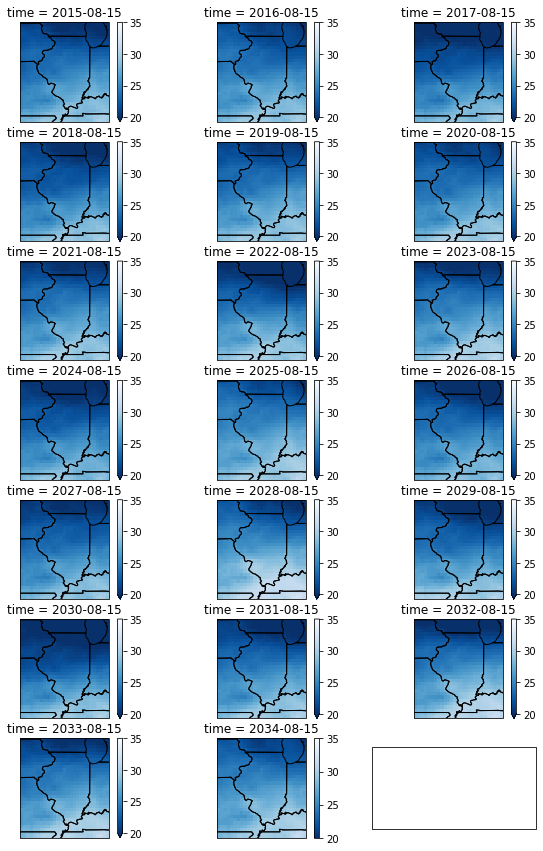

In [5]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2015,2035):
    vp_gddp.sel(time=str(year)+'-08-15T00:00:00').mean('model').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Blues_r', vmin=20, vmax=35)
    ax[i].add_feature(cfeature.STATES)
    i += 1

# Calculated heat indices

In [ ]:
t2m_era5 = era5_processing('2m_temperature', 2004, 2024, 'analysis_ready')

### Heat Index

In [4]:
heat_index_array = heat_index(rh_era5, t2m_era5)
heat_index_array

<xarray.DataArray 'heat_index' (time: 184104, lat: 29, lon: 27)> Size: 577MB
<Quantity(dask.array<add, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>, 'dimensionless')>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/dask/_task_spec.py:755: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*new_argspec)
/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/dask/_task_spec.py:755: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*new_argspec)
/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/dask/_task_spec.py:755: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*new_argspec)
/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/dask/_task_spec.py:755: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*new_argspec)
/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/dask/_task_spec.py:755: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*new_argspec)
/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packag

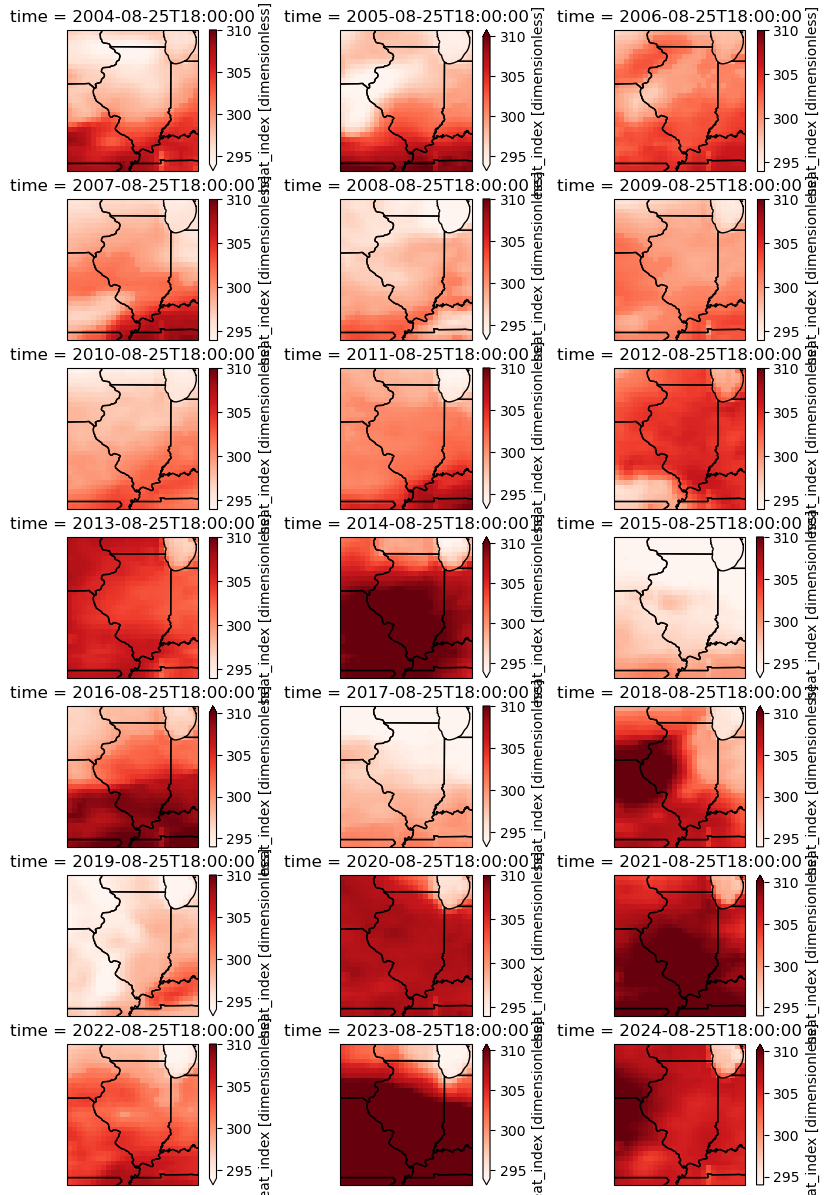

In [8]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    heat_index_array.sel(time=str(year)+'-08-25T18:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=294, vmax=310)
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Wind Chill

In [12]:
windchill = wind_chill(t2m_era5, sfcWind_era5)
windchill

<xarray.DataArray 'wind_chill' (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<add, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

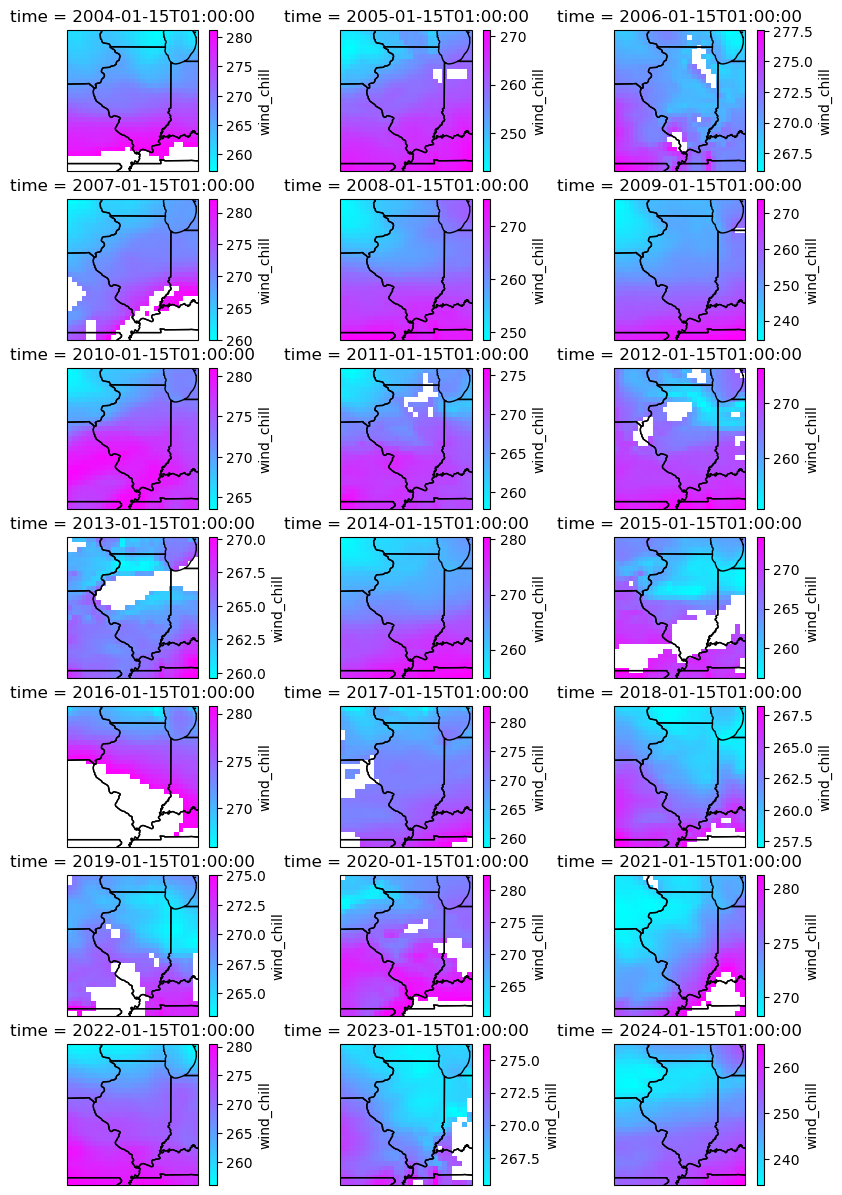

In [14]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    windchill.sel(time=str(year)+'-01-15T01:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='cool',)
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Apparent Temperature

In [4]:
path = '/data/keeling/a/mailes2/Fall2024_Projects/IDPH/'

t2m_era5_load = xr.open_dataarray(path+'ERA5_t2m_hourly_2004_2024_IL_02_24_25.nc')
t2m_era5_load.load()

RH_era5_load = xr.open_dataarray(path+'ERA5_calc_RH_2004_2024_IL_02_21_25.nc')
RH_era5_load.load()

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
array([[[0.650238  , 0.6175153 , 0.5507572 , ..., 0.5885539 ,
         0.58947134, 0.63329476],
        [0.636941  , 0.62151194, 0.5600676 , ..., 0.57772136,
         0.59115803, 0.63278735],
        [0.6250033 , 0.61009175, 0.59330845, ..., 0.56653744,
         0.5799043 , 0.5951446 ],
        ...,
        [0.6077105 , 0.6095644 , 0.6104335 , ..., 0.50173205,
         0.5191231 , 0.53569406],
        [0.60170245, 0.6034051 , 0.60406196, ..., 0.5260378 ,
         0.5395451 , 0.553296  ],
        [0.5877431 , 0.5895582 , 0.60202974, ..., 0.569628  ,
         0.5835341 , 0.55581063]],

       [[0.6313569 , 0.6123944 , 0.60655546, ..., 0.59782165,
         0.59511936, 0.6291935 ],
        [0.6159836 , 0.63406855, 0.6407379 , ..., 0.5867272 ,
         0.59763396, 0.6315796 ],
        [0.5995019 , 0.6150483 , 0.6413286 , ..., 0.5750871 ,
         0.5866188 , 0.6004421 ],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(184104, 29, 27), dtype=float32)
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

In [5]:
app_temp = calculations.apparent_temperature(t2m_era5_load, vapor_p, sfcWind_era5)
app_temp

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<add, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

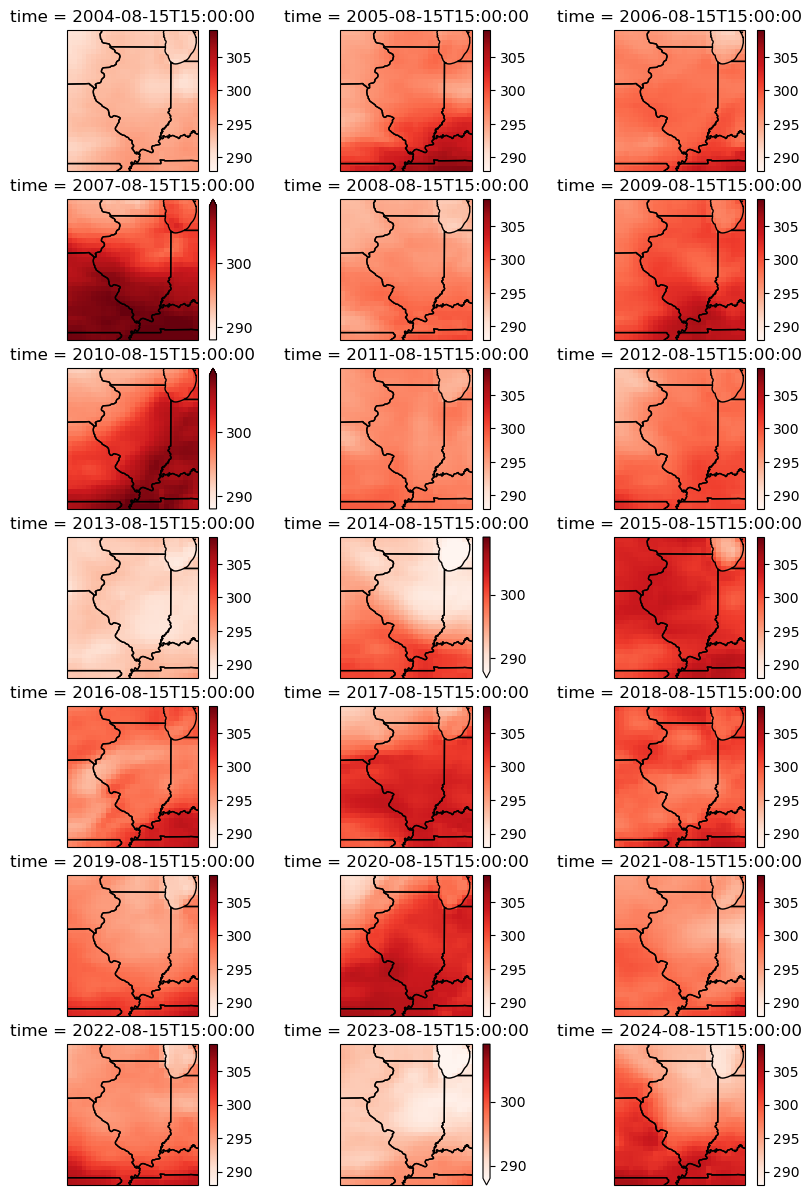

In [7]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    app_temp.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=288, vmax=309)
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Normal Effective Temperature

In [5]:
net = calculations.normal_effective_temperature(t2m_era5_load, RH_era5_load, sfcWind_era5)
net

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<add, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

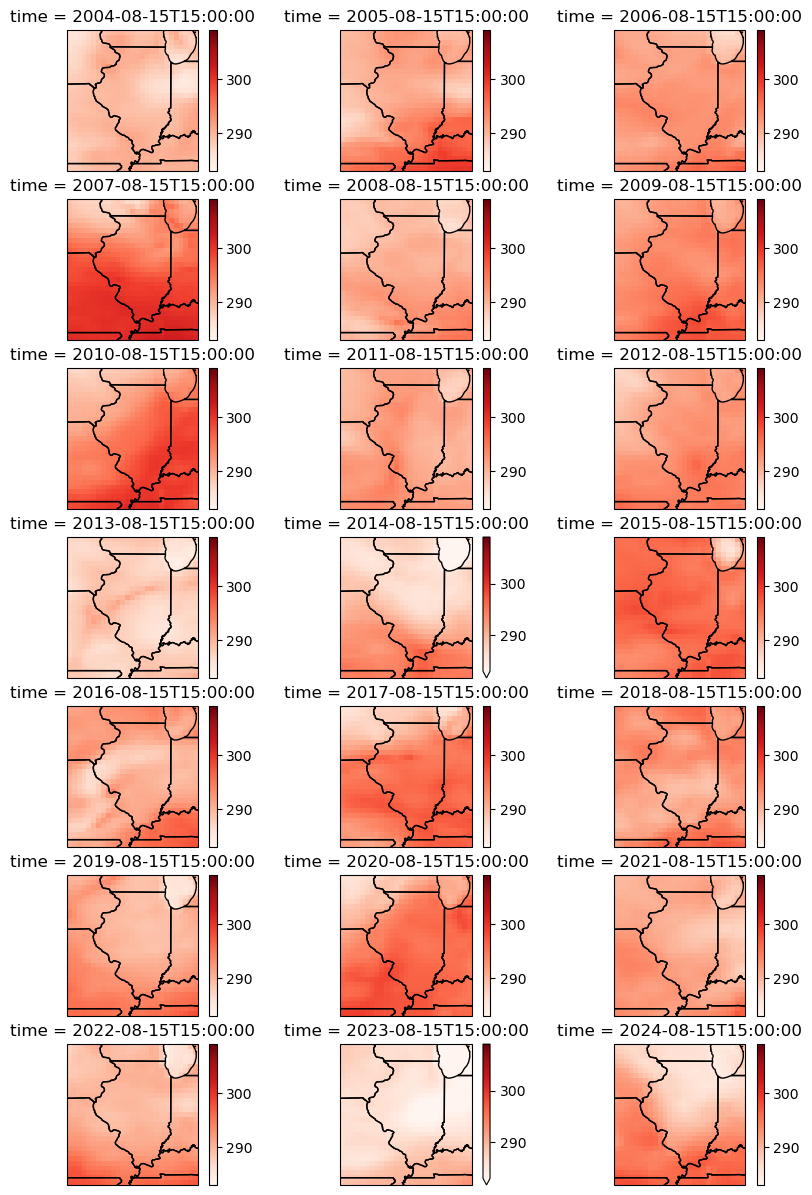

In [8]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    net.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=283, vmax=309)
    ax[i].add_feature(cfeature.STATES)
    i += 1

### Humidex

In [11]:
hum = calculations.humidex(t2m_era5_load, vapor_p)
hum

<xarray.DataArray (time: 184104, lat: 29, lon: 27)> Size: 577MB
dask.array<add, shape=(184104, 29, 27), dtype=float32, chunksize=(48, 29, 27), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 116B 43.25 43.0 42.75 42.5 ... 37.0 36.75 36.5 36.25
  * lon      (lon) float32 108B 267.2 267.5 267.8 268.0 ... 273.2 273.5 273.8
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-12-31T23:00:00

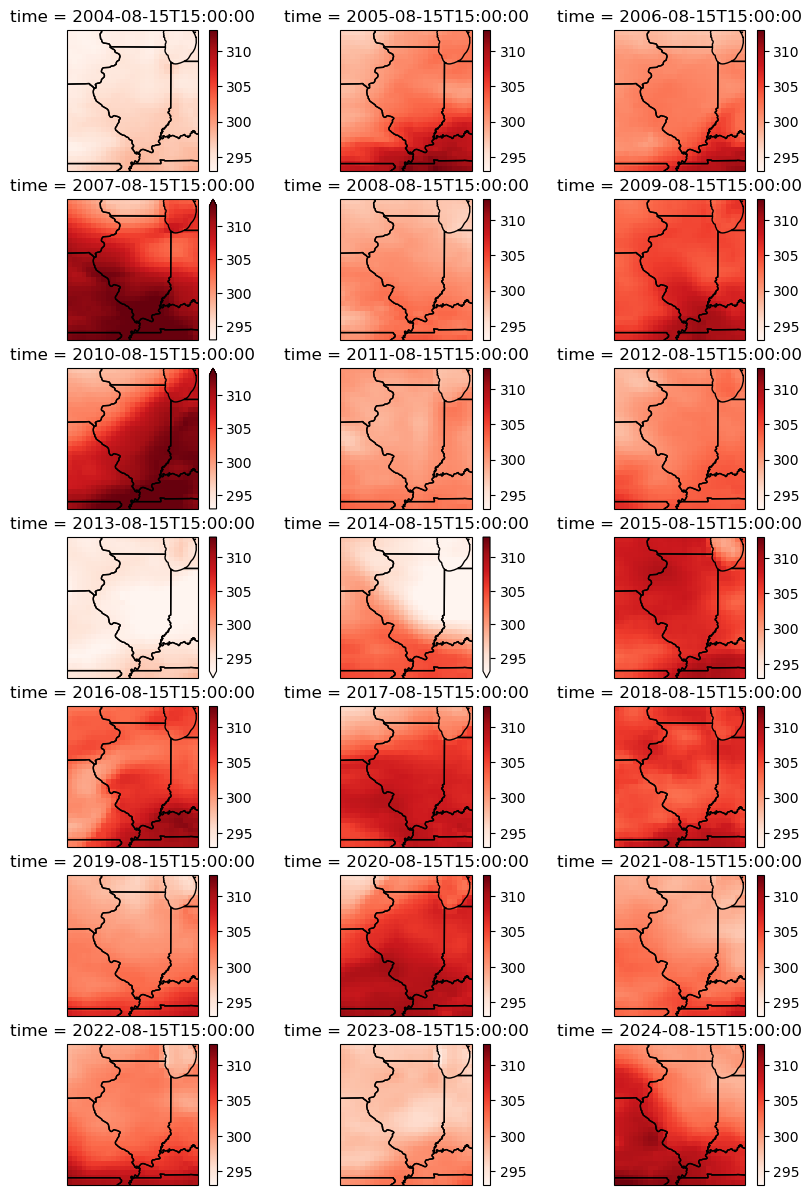

In [12]:
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(7,3, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

i = 0
for year in range(2004,2025):
    hum.sel(time=str(year)+'-08-15T15:00:00').plot.pcolormesh(x='lon', y='lat', ax=ax[i],
                                                transform=ccrs.PlateCarree(), cmap='Reds', vmin=293, vmax=313)
    ax[i].add_feature(cfeature.STATES)
    i += 1